# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 6.8822620231485674, performing 50.5 it/sec
Step 100: Loss = 1.4041244293167348, performing 428.6 it/sec
Step 200: Loss = 0.0040138014599821, performing 578.3 it/sec
No improvement since Step 184, early stopping.
[Best]  Step 183: Loss = 0.0025844627541630
[Final] Step 233: Loss = 0.0057445277975561

predicted end states
------------------------------------
         5th       Mean      95th
LF2D-1  2.58e-09  2.58e-09  2.58e-09
LF2D-2  9.88e-12  9.88e-12  9.88e-12
LF2D-3  1.02e-11  1.02e-11  1.02e-11


predicted conditional events
----------------------------------
       5th       Mean      95th
LF2D  1.00e+00  1.00e+00  1.00e+00
FSIG  3.92e-03  3.92e-03  3.92e-03
FROD  3.81e-03  3.81e-03  3.81e-03




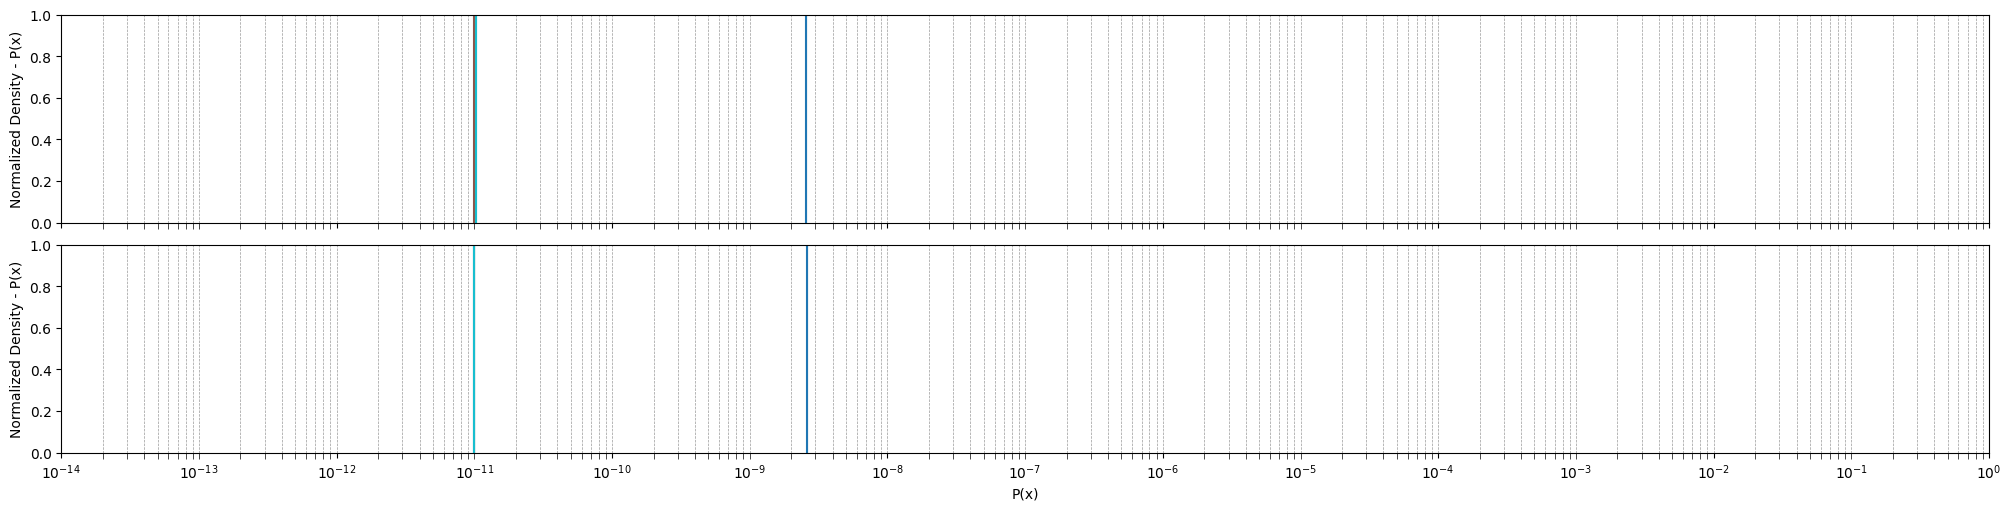

In [3]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 2.6e-9,
 'freeze_initiating_event': True,
}

conditional_events = {
    'names': ['LF2D', 'FSIG', 'FROD'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    # 'LF2D-0': {
    #     'sequence': [0, np.nan, np.nan],
    #     'probability': 1.0 -  2.6e-9 - 1.00e-11 - 1.00e-11, # one minus all the other end-states
    # },
    'LF2D-1': {
        'sequence': [1, 0, 0],
        'probability': 2.60e-9,
    },
    'LF2D-2': {
        'sequence': [1, 0, 1],
        'probability': 1.00e-11,
    },
    'LF2D-3': {
        'sequence': [1, 1, np.nan],
        'probability': 1.00e-11,
      },

}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)